In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Retail_data.csv')

In [3]:
pd.set_option("display.max_columns",500)

In [4]:
df.head()

,hour,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,ordered_item_quantity,net_quantity,returned_item_quantity,order_name,product_type,product_title,product_vendor,variant_title,api_client_title
0,23-05-2021 00:00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,23-05-2021 01:00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,23-05-2021 02:00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,23-05-2021 03:00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,23-05-2021 04:00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(101929, 23)

In [6]:
df.isnull().sum()

hour                          0
order_id                      0
customer_id                   0
product_id                    0
product_price                 0
variant_id                    0
orders                        0
gross_sales                   0
discounts                     0
returns                       0
net_sales                     0
shipping                      0
taxes                         0
total_sales                   0
ordered_item_quantity         0
net_quantity                  0
returned_item_quantity        0
order_name                 5961
product_type              22861
product_title              6483
product_vendor            22366
variant_title             31316
api_client_title           5961
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101929 entries, 0 to 101928
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   hour                    101929 non-null  object 
 1   order_id                101929 non-null  float64
 2   customer_id             101929 non-null  float64
 3   product_id              101929 non-null  float64
 4   product_price           101929 non-null  float64
 5   variant_id              101929 non-null  float64
 6   orders                  101929 non-null  int64  
 7   gross_sales             101929 non-null  float64
 8   discounts               101929 non-null  float64
 9   returns                 101929 non-null  float64
 10  net_sales               101929 non-null  float64
 11  shipping                101929 non-null  float64
 12  taxes                   101929 non-null  float64
 13  total_sales             101929 non-null  float64
 14  ordered_item_quantit

In [8]:
for col in list(df):
    print(f"{col} ---->{df[col].nunique()}")

hour ---->8855
order_id ---->10767
customer_id ---->1038
product_id ---->803
product_price ---->1177
variant_id ---->699
orders ---->2
gross_sales ---->1376
discounts ---->395
returns ---->138
net_sales ---->1506
shipping ---->6
taxes ---->375
total_sales ---->1577
ordered_item_quantity ---->18
net_quantity ---->23
returned_item_quantity ---->6
order_name ---->19374
product_type ---->16
product_title ---->8074
product_vendor ---->174
variant_title ---->188
api_client_title ---->4


In [9]:
df.nunique().to_frame()

,0
hour,8855
order_id,10767
customer_id,1038
product_id,803
product_price,1177
variant_id,699
orders,2
gross_sales,1376
discounts,395
returns,138


Product Analysis

In [10]:
df1=df.dropna()

In [11]:
df1.shape

(70337, 23)

In [12]:
df1.product_type.unique()

array(['Masalas & Spices', 'Others', 'Rice & Rice products',
       'Sweets & Snacks', 'Ready to Cook & Eat', 'Organic', 'Beverages',
       'Pickles, Pastes & Papad', 'Flour & Atta',
       'Pulses, Grains & Millets', 'Noodles & Vermicelli',
       'Health & Body Care', 'Frozen foods', 'Oil', 'Fresh Produce',
       'Pooja Item'], dtype=object)

In [13]:
df.select_dtypes(include='int')

,orders,ordered_item_quantity,net_quantity,returned_item_quantity
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
101924,0,0,0,0
101925,0,0,0,0
101926,0,0,0,0
101927,0,0,0,0


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70337 entries, 11 to 101923
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    70337 non-null  object 
 1   order_id                70337 non-null  float64
 2   customer_id             70337 non-null  float64
 3   product_id              70337 non-null  float64
 4   product_price           70337 non-null  float64
 5   variant_id              70337 non-null  float64
 6   orders                  70337 non-null  int64  
 7   gross_sales             70337 non-null  float64
 8   discounts               70337 non-null  float64
 9   returns                 70337 non-null  float64
 10  net_sales               70337 non-null  float64
 11  shipping                70337 non-null  float64
 12  taxes                   70337 non-null  float64
 13  total_sales             70337 non-null  float64
 14  ordered_item_quantity   70337 non-nu

In [15]:
df1.head(5)

,hour,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,ordered_item_quantity,net_quantity,returned_item_quantity,order_name,product_type,product_title,product_vendor,variant_title,api_client_title
11,23-05-2021 11:00,3.824510e+12,5.268530e+12,5.931930e+12,0.99,3.705210e+13,1,1.82,-0.18,0.0,1.64,0.0,0.14,1.78,1,1,0,#1078,Masalas & Spices,Everest Turmeric Powder,Everest,100 g,Point of Sale
12,23-05-2021 11:00,3.824510e+12,5.268530e+12,5.931930e+12,1.39,3.705210e+13,1,2.54,-0.24,0.0,2.30,0.0,0.20,2.50,1,1,0,#1078,Others,Tata Iodised Crystal Salt,Tata,1 kg,Point of Sale
15,23-05-2021 11:00,3.824510e+12,5.268530e+12,5.908010e+12,10.89,3.696460e+13,1,19.96,-1.98,0.0,17.98,0.0,1.62,19.60,1,1,0,#1078,Rice & Rice products,Udhaiyam Idli Rice,Udhaiyam,5 kg,Point of Sale
19,23-05-2021 11:00,3.824520e+12,0.000000e+00,5.931100e+12,0.39,3.704750e+13,1,1.42,-0.14,0.0,1.28,0.0,0.12,1.40,2,2,0,#1079,Sweets & Snacks,Parle Biscuits - Hide & Seek,Parle G,33 g,Point of Sale
20,23-05-2021 11:00,3.824520e+12,0.000000e+00,5.931100e+12,1.69,3.704750e+13,1,3.08,-0.28,0.0,2.80,0.0,0.26,3.06,1,1,0,#1079,Sweets & Snacks,Parle Biscuits - Monaco,Parle G,200 g,Point of Sale


In [16]:
product_orders=df1.groupby('product_type')['orders'].sum().to_frame()
product_orders

,orders
product_type,
Beverages,1375
Flour & Atta,3580
Fresh Produce,2970
Frozen foods,8379
Health & Body Care,1482
Masalas & Spices,7300
Noodles & Vermicelli,3155
Oil,1074
Organic,1182


In [17]:
product_sales=df1.groupby('product_type')[['total_sales']].sum().sort_values(by='total_sales',ascending=False).reset_index()
product_sales

,product_type,total_sales
0,Sweets & Snacks,95172.74
1,Frozen foods,77319.64
2,Rice & Rice products,61453.36
3,"Pulses, Grains & Millets",40477.44
4,Flour & Atta,39526.22
5,Others,37904.90
6,Masalas & Spices,32023.62
7,Ready to Cook & Eat,29291.16
8,"Pickles, Pastes & Papad",21054.76
9,Beverages,17891.24


In [18]:
pd.merge(left=product_orders,right=product_sales,on='product_type',how='inner')

,product_type,orders,total_sales
0,Beverages,1375,17891.24
1,Flour & Atta,3580,39526.22
2,Fresh Produce,2970,15771.52
3,Frozen foods,8379,77319.64
4,Health & Body Care,1482,13532.18
5,Masalas & Spices,7300,32023.62
6,Noodles & Vermicelli,3155,16181.66
7,Oil,1074,13906.94
8,Organic,1182,7293.68
9,Others,5448,37904.90


In [19]:
product_type_analysis=df1.groupby('product_type').agg({'orders':sum,'total_sales':sum}).reset_index()
product_type_analysis

,product_type,orders,total_sales
0,Beverages,1375,17891.24
1,Flour & Atta,3580,39526.22
2,Fresh Produce,2970,15771.52
3,Frozen foods,8379,77319.64
4,Health & Body Care,1482,13532.18
5,Masalas & Spices,7300,32023.62
6,Noodles & Vermicelli,3155,16181.66
7,Oil,1074,13906.94
8,Organic,1182,7293.68
9,Others,5448,37904.90


Text(0.5, 1.0, 'Total Orders and Sales per product Type')

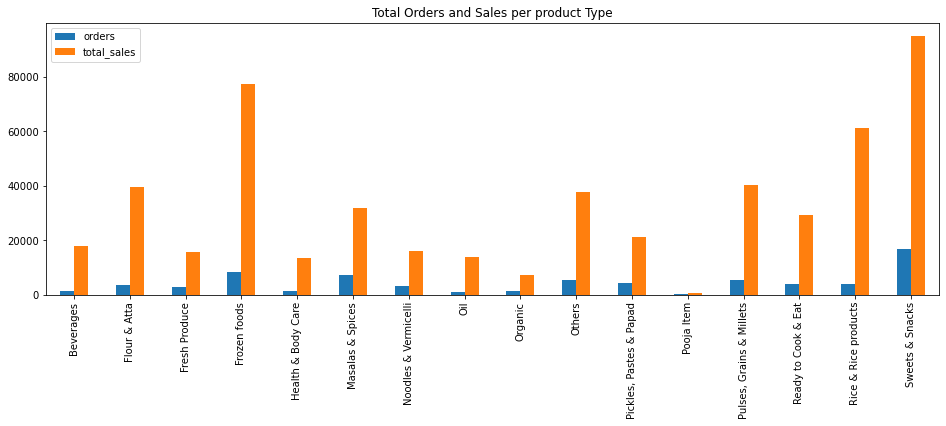

In [20]:
product_type_analysis.plot(kind='bar',figsize=(16,5));
plt.xticks(range(0,16),product_type_analysis['product_type'].values);
plt.title("Total Orders and Sales per product Type")

In [21]:
df1.api_client_title.value_counts()

Point of Sale                 65082
Online Store                   5214
Draft Orders                     27
Shopify Mobile for Android       14
Name: api_client_title, dtype: int64

In [22]:
source_of_sales=df1.pivot_table(index='api_client_title',columns='product_type',values='total_sales',aggfunc='sum')
source_of_sales

product_type,Beverages,Flour & Atta,Fresh Produce,Frozen foods,Health & Body Care,Masalas & Spices,Noodles & Vermicelli,Oil,Organic,Others,"Pickles, Pastes & Papad",Pooja Item,"Pulses, Grains & Millets",Ready to Cook & Eat,Rice & Rice products,Sweets & Snacks
api_client_title,,,,,,,,,,,,,,,,
Draft Orders,NaN,97.24,2.00,0.00,NaN,34.34,7.58,NaN,15.56,213.44,3.98,NaN,29.94,NaN,45.34,3.78
Online Store,1517.44,5838.04,4328.98,3828.76,1035.42,3091.02,1258.60,1685.34,27.00,2427.24,1846.92,98.00,4018.42,1647.34,9676.18,3898.00
Point of Sale,16373.80,33503.82,11437.56,73482.90,12496.76,28898.26,14909.50,12195.24,7251.12,35254.24,19203.86,681.94,36425.38,27643.82,51731.84,91187.10
Shopify Mobile for Android,NaN,87.12,2.98,7.98,NaN,NaN,5.98,26.36,0.00,9.98,NaN,NaN,3.70,NaN,NaN,83.86


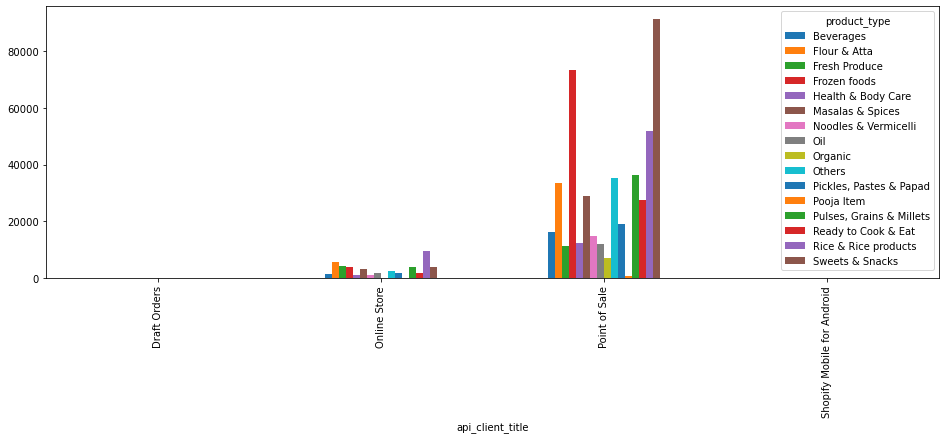

In [23]:
source_of_sales.plot(kind='bar',figsize=(16,5));

In [24]:
source_of_mean_sales=df1.pivot_table(index='api_client_title',columns='product_type',values='total_sales',aggfunc='mean')
source_of_mean_sales

product_type,Beverages,Flour & Atta,Fresh Produce,Frozen foods,Health & Body Care,Masalas & Spices,Noodles & Vermicelli,Oil,Organic,Others,"Pickles, Pastes & Papad",Pooja Item,"Pulses, Grains & Millets",Ready to Cook & Eat,Rice & Rice products,Sweets & Snacks
api_client_title,,,,,,,,,,,,,,,,
Draft Orders,NaN,16.206667,2.000000,0.000000,NaN,17.170000,7.580000,NaN,7.780000,53.360000,3.980000,NaN,9.980000,NaN,15.113333,1.260000
Online Store,14.876863,15.322940,5.913907,9.548030,10.151176,4.740828,6.730481,15.605000,4.500000,8.731079,5.116122,2.969697,7.742620,7.733991,19.992107,5.951145
Point of Sale,12.832132,10.463404,5.117477,9.206076,9.029451,4.339730,5.021724,12.624472,6.150229,6.805838,5.061639,3.294396,7.727064,7.613280,14.572349,5.644862
Shopify Mobile for Android,NaN,87.120000,1.490000,1.995000,NaN,NaN,5.980000,13.180000,0.000000,9.980000,NaN,NaN,3.700000,NaN,NaN,83.860000


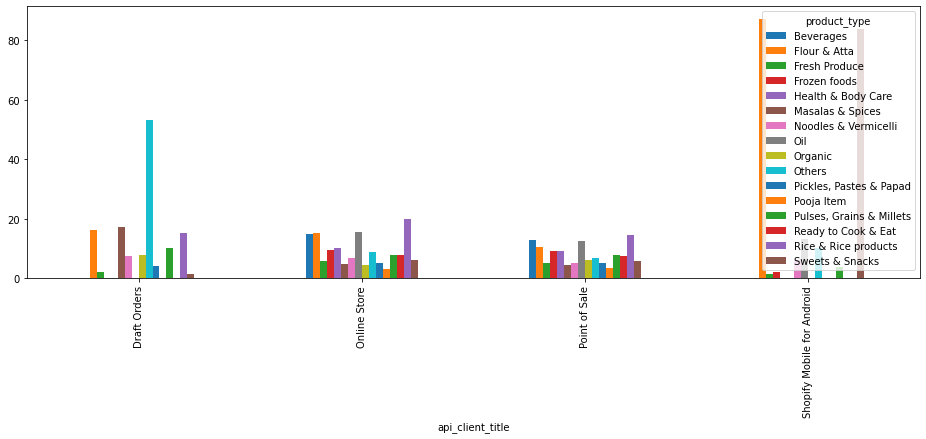

In [25]:
source_of_mean_sales.plot(kind='bar',figsize=(16,5));

# Assignments for Product Analysis 

In [26]:
df1.columns

Index(['hour', 'order_id', 'customer_id', 'product_id', 'product_price',
       'variant_id', 'orders', 'gross_sales', 'discounts', 'returns',
       'net_sales', 'shipping', 'taxes', 'total_sales',
       'ordered_item_quantity', 'net_quantity', 'returned_item_quantity',
       'order_name', 'product_type', 'product_title', 'product_vendor',
       'variant_title', 'api_client_title'],
      dtype='object')

### 1.For each product_type how many products are associated?  (Graph expected)

In [27]:
Product_details=df1.groupby('product_type')['product_title'].nunique().to_frame().reset_index().sort_values(by='product_title', ascending= False)
Product_details

,product_type,product_title
5,Masalas & Spices,232
15,Sweets & Snacks,224
10,"Pickles, Pastes & Papad",157
3,Frozen foods,148
9,Others,139
13,Ready to Cook & Eat,119
1,Flour & Atta,89
14,Rice & Rice products,75
12,"Pulses, Grains & Millets",71
4,Health & Body Care,68


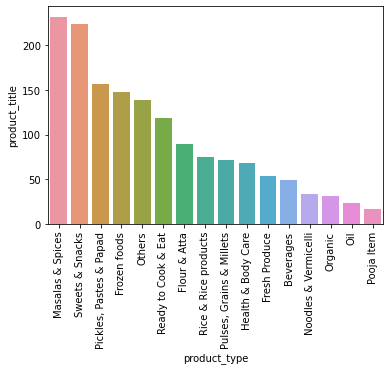

In [28]:
sns.barplot(x=Product_details['product_type'],y=Product_details['product_title'])
plt.xticks(rotation='vertical')
plt.show()

**Observations**:from the above graph i found that *Masalas & Spices* product_type has the most number of products then followed by *Sweets & Snacks*

### 2.For each product_type how many products are associated and thier sales
### Output expected:
**Output cols = product_type,product_title,total_sales**

In [29]:
Sales_analysis=df1.groupby('product_type').agg({'product_title':'nunique','total_sales':sum}).reset_index().sort_values(by='total_sales', ascending= False)
Sales_analysis

,product_type,product_title,total_sales
15,Sweets & Snacks,224,95172.74
3,Frozen foods,148,77319.64
14,Rice & Rice products,75,61453.36
12,"Pulses, Grains & Millets",71,40477.44
1,Flour & Atta,89,39526.22
9,Others,139,37904.90
5,Masalas & Spices,232,32023.62
13,Ready to Cook & Eat,119,29291.16
10,"Pickles, Pastes & Papad",157,21054.76
0,Beverages,49,17891.24


### 3. Which product has the most sales ? (Graph expected)

In [30]:
max_sales=df1.groupby('product_title')['total_sales'].sum().to_frame().reset_index().sort_values(by = 'total_sales', ascending= False)
max_top=max_sales.head(5)

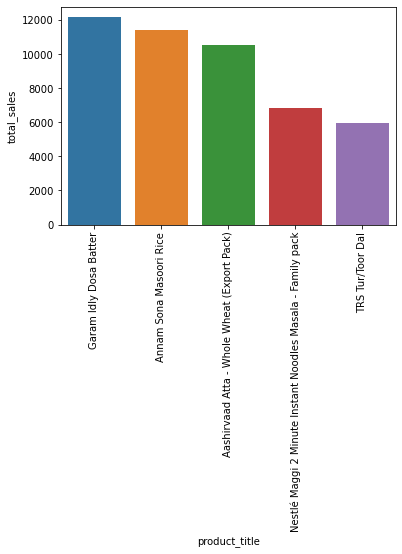

In [31]:
sns.barplot(x=max_top['product_title'],y=max_top['total_sales'],data=max_top)
plt.xticks(rotation='vertical')
plt.show()

**Observations**: *Garam Idly Dosa Batter* is the most sale product

### Which product has the least sales?

In [32]:
min_sales=df1.groupby('product_title')['total_sales'].sum().to_frame().reset_index().sort_values(by = 'total_sales', ascending= True)
min_top=min_sales.head(5)

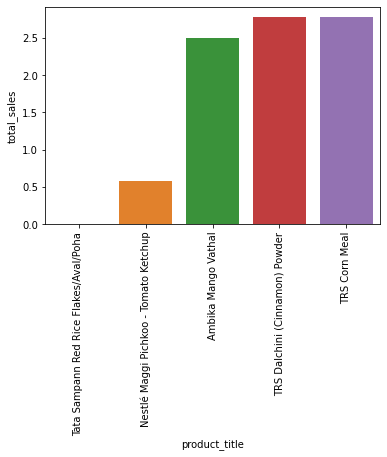

In [33]:
sns.barplot(x=min_top['product_title'],y=min_top['total_sales'],data=min_top)
plt.xticks(rotation='vertical')
plt.show()

**Observations**: *Tata Sampann Red Rice Flakes/Aval/Poha* is the least sale product

### 4.Does the most sold product and least sold product has equal sales in every month or not?

In [34]:
df1['month']=pd.to_datetime(df1['hour']).dt.month

In [35]:
df1['year']=pd.to_datetime(df['hour']).dt.year

In [36]:
x=df1[(df1['product_title']=='Garam Idly Dosa Batter')|(df1['product_title']=='Tata Sampann Red Rice Flakes/Aval/Poha')]


In [37]:
sale_comparison_m=x.pivot_table(index='product_title',columns='month',values='total_sales',aggfunc='sum')
sale_comparison_m

month,1,2,3,4,5,6,7,8,9,10,11,12
product_title,,,,,,,,,,,,
Garam Idly Dosa Batter,1055.36,1025.34,1276.9,1048.82,1078.22,661.92,1057.74,923.34,897.78,916.1,977.62,1253.08
Tata Sampann Red Rice Flakes/Aval/Poha,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


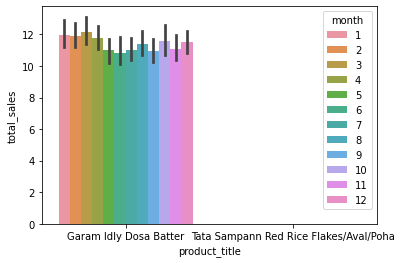

In [38]:
sns.barplot(x = 'product_title',y = 'total_sales',hue = 'month',data = x)
plt.show()

### 5.Has the most sold product and least sold product has equal sales in every year or not?

In [39]:
sale_comparison_y=x.pivot_table(index='product_title',columns='year',values='total_sales',aggfunc='sum')
sale_comparison_y

year,2021,2022
product_title,,
Garam Idly Dosa Batter,6302.48,5869.74
Tata Sampann Red Rice Flakes/Aval/Poha,0.00,NaN


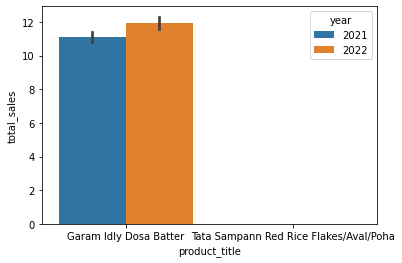

In [40]:
sns.barplot(x = 'product_title',y = 'total_sales',hue = 'year',data = x)
plt.show()

### 6. Check if any products sold has any relationship w.r.t to customers? (Graph expected)

In [41]:
customer_product_analysis=df1.groupby('customer_id')['product_title'].count().to_frame().reset_index().sort_values(by = 'product_title', ascending= False)
customer_product_analysis

,customer_id,product_title
0,0.000000e+00,6624
36,5.268980e+12,601
35,5.268960e+12,538
4,3.980040e+12,473
40,5.269050e+12,461
...,...,...
412,5.391280e+12,1
414,5.392980e+12,1
824,6.084520e+12,1
438,5.401440e+12,1


In [42]:
customer_product_analysis.corr()

,customer_id,product_title
customer_id,1.000000,-0.540514
product_title,-0.540514,1.000000


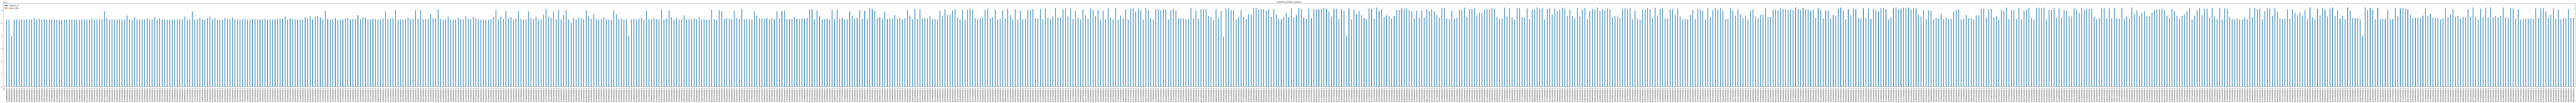

In [43]:
customer_product_analysis.plot(kind='bar',figsize=(300,10));
plt.xticks(range(0,1025),customer_product_analysis['customer_id'].values);
plt.title("customer_product_analysis")
plt.show()

### 7.Check the relationship between product_title and vartaint w.r.t total_sales? (Graph expected)

In [44]:
Product_variant_sale=df1.groupby(['product_title','variant_title'])['total_sales'].sum().reset_index().sort_values(by = 'product_title',ascending= True)
Product_variant_sale

,product_title,variant_title,total_sales
0,24 Mantra Organic 7 Grain Atta,1 kg,142.92
1,24 Mantra Organic Bajra Flour,500 g,84.64
2,24 Mantra Organic Black Pepper (Whole),100 g,172.70
3,24 Mantra Organic Chana (Brown),500 g,146.44
4,24 Mantra Organic Chana Dal/Bengal Gram,1 kg,149.72
...,...,...,...
1849,Weikfield Glucose - D,500 g,18.00
1850,Weikfield Pani Puri Chutney,283 g,223.26
1852,Woodward's Gripe Water,200 ml,33.86
1851,Woodward's Gripe Water,130 ml,47.88


<AxesSubplot:>

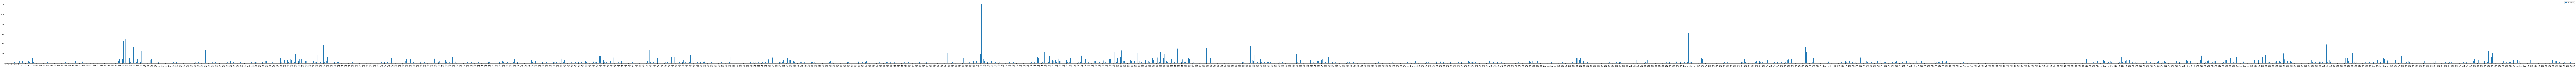

In [45]:
Product_variant_sale.plot(kind='bar',figsize=(400,10))

### 8. Does price of the product affect the sales?

In [46]:
df1.groupby('product_price')['total_sales'].nunique().to_frame().sort_values(by='total_sales',ascending=False)

,total_sales
product_price,
1.99,43
0.99,42
3.49,39
2.99,38
1.89,35
...,...
7.96,1
8.69,1
9.39,1


### 9. Is the highest and least sold product same each month?

###  10.Does vendor role plays a factor in affecting the sales?  

In [47]:
pro_vendor_sale_analysis=df1.groupby('product_title').agg({'product_vendor':'unique','total_sales':sum}).reset_index().sort_values(by = 'product_title',ascending= True)
pro_vendor_sale_analysis

,product_title,product_vendor,total_sales
0,24 Mantra Organic 7 Grain Atta,[24 Mantra],142.92
1,24 Mantra Organic Bajra Flour,[24 Mantra],84.64
2,24 Mantra Organic Black Pepper (Whole),[24 Mantra],172.70
3,24 Mantra Organic Chana (Brown),[24 Mantra],146.44
4,24 Mantra Organic Chana Dal/Bengal Gram,[24 Mantra],149.72
...,...,...,...
1503,Weikfield Custard Powder - Vanilla,[Weikfield],39.84
1504,Weikfield Glucose - D,[Weikfield],18.00
1505,Weikfield Pani Puri Chutney,[Weikfield],223.26
1506,Woodward's Gripe Water,[Woodward],81.74


### 11.is there any relationship between product,vendor and price?

In [48]:
pro_vendor_analysis=df1.groupby(['product_vendor','product_title'])['product_price'].nunique().to_frame().reset_index().sort_values(by = 'product_title',ascending= False)
pro_vendor_analysis

,product_vendor,product_title,product_price
1522,dbanyan,Yam,1
1457,Woodward,Woodward's Gripe Water,2
1456,Weikfield,Weikfield Pani Puri Chutney,1
1455,Weikfield,Weikfield Glucose - D,1
1454,Weikfield,Weikfield Custard Powder - Vanilla,1
...,...,...,...
4,24 Mantra,24 Mantra Organic Chana Dal/Bengal Gram,2
3,24 Mantra,24 Mantra Organic Chana (Brown),1
2,24 Mantra,24 Mantra Organic Black Pepper (Whole),3
1,24 Mantra,24 Mantra Organic Bajra Flour,1
